In [1]:
import pandas as pd
import numpy as np
import requests
import json
#Matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.lines as mlines
from matplotlib import style
style.use(['classic','dark_background'])
#Latitude Longitude
from geopy.geocoders import Nominatim
import time
#Display all columns
pd.set_option('display.max_columns', None)
# Suppress Warnings
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
annual_perf='../Data/AnnualPerformance.csv'
house_inventory='../Data/HousingInventory.csv'
house_manufacturing='../Data/ManufacturingHousingSurvey.csv'
hew_home='../Data/NewHomeSold.csv'
new_residential='../Data/NewResidentialConstruction.csv'
performance_risk_metric='../Data/PerformanceRiskMetrics.csv'
rental_vac='../Data/RentalVacancy.csv'
rate='../Data/InterestRate.csv'

interest_rate=pd.read_csv(rate)
annual_performance=pd.read_csv(annual_perf)
housing_inventory=pd.read_csv(house_inventory)
housing_manufacturing=pd.read_csv(house_manufacturing)
hew_homes=pd.read_csv(hew_home)
new_residential_construction=pd.read_csv(new_residential)
performance_risk_metrics=pd.read_csv(performance_risk_metric)
rental_vacancy=pd.read_csv(rental_vac)

In [3]:
# chicago='../Data/Chicago_Crimes.csv'
# chicago_crime_statistics=pd.read_csv(chicago)

# Chicago Crime Data

In [4]:
# chicago_crime_statistics

In [5]:
# chicago_crime_statistics_df=chicago_crime_statistics.dropna()

In [6]:
# crime_type=chicago_crime_statistics_df.groupby(['Primary Type']).count()
# sorted_crime_type=crime_type.sort_values(by=['ID'], ascending=False)
# top_twenty_crimes=sorted_crime_type[:21] 
# top_five_crimes=sorted_crime_type[:5]
# top_five_crimes

In [7]:
# top_five_crimes['ID']
# pie_df=top_five_crimes['ID']
# ## Build percentage of rides by city type pie chart.
# plt.subplots(figsize=(10, 6))
# plt.pie(pie_df,
#     labels=['Theft', 'Battery', 'Criminal Damage', 'Narcotics', 'Assault'],
#     colors=["green", "orange", "red", "purple",  'blue'],
#     explode=[0.1, 0, 0,0,0],
#     autopct='%1.1f%%',
#     shadow=True, startangle=150)
# plt.title("5 Year Chicago Crime Rate")
# # Change the default font size from 10 to 14.
# mpl.rcParams['font.size'] = 14
# plt.savefig("ChicagoCrimeRate.png", bbox_inches='tight')
# plt.show()

# Annual Performance

In [8]:
annual_performance

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Published:,"Dec 29, 2020",NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Effective Date,NaN,Annualized Returns,NaN,NaN
5,NaN,NaN,1 Year,3 Year,5 Year,10 Year
6,Index Level\nS&P CoreLogic Case-Shiller 20-Cit...,Oct-2020,7.95%,5.00%,5.26%,4.96%
7,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN


# Performance Risks

In [9]:
performance_risk_metrics

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,As of:,"Oct 31, 2020",NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Annualized Risk,NaN,NaN,NaN,Annualized Risk - Adj Returns,NaN,NaN
5,NaN,3 Year,5 Year,10 Year,NaN,3 Year,5 Year,10 Year
6,S&P CoreLogic Case-Shiller 20-City Composite H...,1.52%,1.43%,2.63%,NaN,3.29,3.67,1.89
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Housing Inventory

In [10]:
housing_inventory_df=housing_inventory[-21:]
housing_inventory_df.rename(columns={'Unnamed: 0':'Year', 'Unnamed: 1':'Q1', 'U.S. Census Bureau':'Q2', 'Unnamed: 3':'Q3', 'Unnamed: 4':'Q4' }, inplace=True) 
housing_inventory_df=housing_inventory_df.set_index(['Year'])
# Convert Objects to Floats
housing_inventory_df['Q1']=housing_inventory_df['Q1'].str.replace(',', '').astype(float)
housing_inventory_df['Q2']=housing_inventory_df['Q2'].str.replace(',', '').astype(float)
housing_inventory_df['Q3']=housing_inventory_df['Q3'].str.replace(',', '').astype(float)
housing_inventory_df['Q4']=housing_inventory_df['Q4'].str.replace(',', '').astype(float)
housing_inventory_df['Mean']=housing_inventory_df.mean(axis=1).map('{:.0f}'.format) 

housing_inventory_df.reset_index(inplace=True)
housing_inventory_df['Year']=pd.to_datetime(housing_inventory_df['Year'])
housing_inventory_df['Mean']=housing_inventory_df['Mean'].astype(float)

housing_inventory_df.to_excel("housingInventory.xlsx")

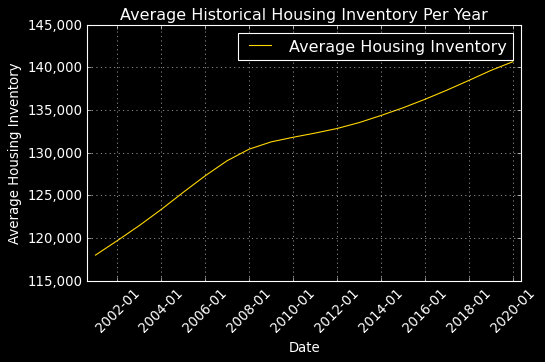

In [11]:
# plot just crude prices on one graph
fig, ax1=plt.subplots( figsize=(7,4))

ax1.set_xlabel('Date')
ax1.set_ylabel('Average Housing Inventory')
ax1.plot(housing_inventory_df['Year'],housing_inventory_df['Mean'], color='gold')
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
_=plt.xticks(rotation=45)
ax1.tick_params(axis='y')
ax1.set_title("Average Historical Housing Inventory Per Year")
plt.margins(x=.02)

ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax1.grid()

# defining legend style and data
blue_line = mlines.Line2D([], [], color='gold', label='Average Housing Inventory')
plt.legend(handles=[blue_line], loc='best')
plt.savefig("HousingInventory.png", bbox_inches='tight')

# Rental Vacancies

In [12]:
rental_vacancy_df=rental_vacancy[-21:]
rental_vacancy_df.rename(columns={'Unnamed: 0':'Year', 'Unnamed: 1':'Q1', 'U.S. Census Bureau':'Q2', 'Unnamed: 3':'Q3', 'Unnamed: 4':'Q4' }, inplace=True)        
rental_vacancy_df.set_index(['Year'], inplace=True)
# Convert Objects to Floats
rental_vacancy_df['Q1']=rental_vacancy_df['Q1'].astype(float)
rental_vacancy_df['Q2']=rental_vacancy_df['Q2'].astype(float)
rental_vacancy_df['Q3']=rental_vacancy_df['Q3'].astype(float)
rental_vacancy_df['Q4']=rental_vacancy_df['Q4'].astype(float)
# Average the Columns to get Mean for each year
rental_vacancy_df['Mean'] = rental_vacancy_df.mean(axis=1).map('{:.2f}'.format)
rental_vacancy_df.reset_index(inplace=True)
rental_vacancy_df['Year']=pd.to_datetime(rental_vacancy_df['Year']) 
rental_vacancy_df['Mean']=rental_vacancy_df['Mean'].astype(float)
rental_vacancy_df.to_excel("rentalVacancy.xlsx")

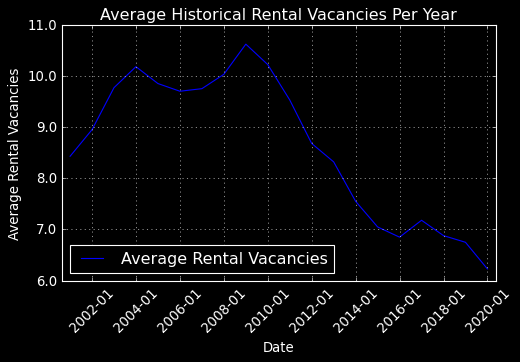

In [13]:
# plot just crude prices on one graph
fig, ax1=plt.subplots( figsize=(7,4))

ax1.set_xlabel('Date')
ax1.set_ylabel('Average Rental Vacancies')
ax1.plot(rental_vacancy_df['Year'],rental_vacancy_df['Mean'], color='blue')
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
_=plt.xticks(rotation=45)
ax1.tick_params(axis='y')
ax1.set_title("Average Historical Rental Vacancies Per Year")
plt.margins(x=.02)

ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.1f}'))
ax1.grid()

# defining legend style and data
blue_line = mlines.Line2D([], [], color='blue', label='Average Rental Vacancies')
plt.legend(handles=[blue_line], loc='best')
plt.savefig("RentalVacancies.png", bbox_inches='tight')

# Housing Manufacturing

In [14]:
housing_manufacturing_df=housing_manufacturing[-8:-1] 
housing_manufacturing_df=housing_manufacturing_df.rename(columns={'Unnamed: 0':'Year', 'Unnamed: 1':'January', 'U.S. Census Bureau':'February', 'Unnamed: 3':'March', 'Unnamed: 4':'April', 'Unnamed: 5':'May', 'Unnamed: 6':'June', 'Unnamed: 7':'July', 'Unnamed: 8':'August', 'Unnamed: 9':'Spetember', 'Unnamed: 10':'October', 'Unnamed: 11':'November', 'Unnamed: 12':'December'} ) 
housing_manufacturing_df=housing_manufacturing_df.set_index(['Year'])
housing_manufacturing_df['Mean']=housing_manufacturing_df.mean(axis=1)

In [15]:
housing_manufacturing_df['January']=housing_manufacturing_df['January'].astype(float)
housing_manufacturing_df['February']=housing_manufacturing_df['February'].astype(float)
housing_manufacturing_df['March']=housing_manufacturing_df['March'].astype(float)
housing_manufacturing_df['April']=housing_manufacturing_df['April'].astype(float)
housing_manufacturing_df['May']=housing_manufacturing_df['May'].astype(float)
housing_manufacturing_df['June']=housing_manufacturing_df['June'].astype(float)
housing_manufacturing_df['July']=housing_manufacturing_df['July'].astype(float)
housing_manufacturing_df['August']=housing_manufacturing_df['August'].astype(float)
housing_manufacturing_df['Spetember']=housing_manufacturing_df['Spetember'].astype(float)
housing_manufacturing_df['October']=housing_manufacturing_df['October'].astype(float)
housing_manufacturing_df['November']=housing_manufacturing_df['November'].astype(float)
housing_manufacturing_df['December']=housing_manufacturing_df['December'].astype(float)
housing_manufacturing_df['Mean']=housing_manufacturing_df.mean(axis=1)
housing_manufacturing_df

,January,February,March,April,May,June,July,August,Spetember,October,November,December,Mean
Year,,,,,,,,,,,,,
2014,4.4,4.4,4.9,5.7,5.7,5.6,5.7,6.0,5.9,6.5,5.0,4.7,5.375000
2015,5.0,4.8,5.6,6.1,5.8,6.1,6.1,6.3,6.3,6.8,6.0,5.7,5.883333
2016,5.9,6.1,7.1,6.7,6.8,7.3,5.3,7.4,7.3,7.2,7.1,7.0,6.766667
2017,7.8,7.3,8.2,7.2,7.9,8.2,5.8,8.4,7.6,8.6,8.6,7.2,7.733333
2018,8.6,8.1,8.8,8.3,8.8,8.3,6.8,9.2,7.5,8.6,7.7,5.9,8.050000
2019,7.6,7.2,7.6,8.0,8.6,7.8,7.1,8.6,8.0,9.4,8.0,6.7,7.883333
2020,8.7,8.2,8.3,6.6,6.6,7.6,7.5,7.9,8.1,9.0,NaN,NaN,7.850000


In [16]:
housing_manufacturing_df.reset_index(inplace=True)
housing_manufacturing_df['Year']=pd.to_datetime(housing_manufacturing_df['Year'])

In [17]:
housing_manufacturing_df.to_excel("HousingManufacturing.xlsx")

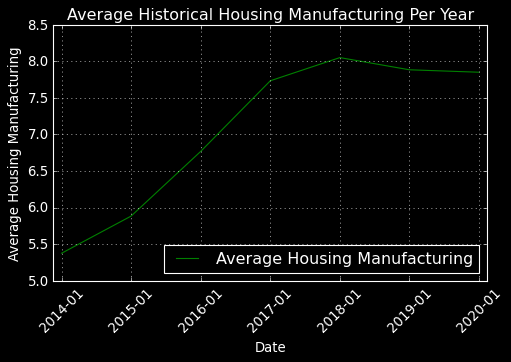

In [18]:
# plot just crude prices on one graph
fig, ax1=plt.subplots( figsize=(7,4))

ax1.set_xlabel('Date')
ax1.set_ylabel('Average Housing Manufacturing')
ax1.plot(housing_manufacturing_df['Year'],housing_manufacturing_df['Mean'], color='green')
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
_=plt.xticks(rotation=45)
ax1.tick_params(axis='y')
ax1.set_title("Average Historical Housing Manufacturing Per Year")
plt.margins(x=.02)

ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.1f}'))
ax1.grid()

# defining legend style and data
blue_line = mlines.Line2D([], [], color='green', label='Average Housing Manufacturing')
plt.legend(handles=[blue_line], loc='best')
plt.savefig("HousingManufacturing.png", bbox_inches='tight')


# Housing Sales

In [19]:
hew_homes_df=hew_homes[-21:]
hew_homes_df=hew_homes_df.rename(columns={'Unnamed: 0':'Year', 'Unnamed: 1':'January', 'U.S. Census Bureau':'February', 'Unnamed: 3':'March', 'Unnamed: 4':'April', 'Unnamed: 5':'May', 'Unnamed: 6':'June', 'Unnamed: 7':'July', 'Unnamed: 8':'August', 'Unnamed: 9':'September', 'Unnamed: 10':'October', 'Unnamed: 11':'November', 'Unnamed: 12':'December'})  
hew_homes_df=hew_homes_df.set_index(['Year'])
hew_homes_df.to_excel("newHomeSales.xlsx")
hew_homes_df.head(15) 

,January,February,March,April,May,June,July,August,September,October,November,December
Year,,,,,,,,,,,,
2001,936,963,939,909,885,882,880,866,853,871,924,979
2002,880,948,923,936,978,957,956,"1,014","1,044","1,006","1,024","1,048"
2003,999,936,999,"1,012","1,078","1,193","1,168","1,206","1,131","1,144","1,093","1,129"
2004,"1,165","1,159","1,276","1,186","1,241","1,180","1,088","1,175","1,214","1,305","1,179","1,242"
2005,"1,203","1,319","1,328","1,260","1,286","1,274","1,389","1,255","1,244","1,336","1,214","1,239"
2006,"1,174","1,061","1,116","1,123","1,086","1,074",965,"1,035","1,016",941,"1,003",998
2007,891,828,833,887,842,793,778,699,686,727,641,619
2008,627,593,535,536,504,487,477,435,433,393,389,377
2009,336,372,339,337,376,393,411,418,386,396,375,352


In [20]:
df=hew_homes_df
df.columns = pd.to_datetime(pd.Series(df.columns), format='%B').dt.month
df=df.stack() 
df

Year    
2001  1     936
      2     963
      3     939
      4     909
      5     885
           ... 
2020  7     979
      8     977
      9     965
      10    945
      11    841
Length: 239, dtype: object

In [21]:
df=df.reset_index()
df

,Year,level_1,0
0,2001,1,936
1,2001,2,963
2,2001,3,939
3,2001,4,909
4,2001,5,885
...,...,...,...
234,2020,7,979
235,2020,8,977
236,2020,9,965
237,2020,10,945


In [22]:
df['Date'] = pd.to_datetime(df['Year'].astype(str) 
                            + '-' + df['level_1'].astype(str) 
                            + '-' + str(1)) 

In [23]:
df = (df
      .rename(columns={0:'Value'})
      .drop(['Year', 'level_1'], axis=1)
      .reindex(['Date', 'Value'], axis=1)
     )
df.to_excel('../Data/HousingDataOneColumn.xlsx')

# New Residential Construction

In [24]:
new_residential_construction_df=new_residential_construction[-21:]
new_residential_construction_df=new_residential_construction_df.rename(columns={'Unnamed: 0':'Year', 'Unnamed: 1':'January', 'U.S. Census Bureau':'February', 'Unnamed: 3':'March', 'Unnamed: 4':'April', 'Unnamed: 5':'May', 'Unnamed: 6':'June', 'Unnamed: 7':'July', 'Unnamed: 8':'August', 'Unnamed: 9':'September', 'Unnamed: 10':'October', 'Unnamed: 11':'November', 'Unnamed: 12':'December'})      
new_residential_construction_df=new_residential_construction_df.set_index(['Year'])
new_residential_construction_df.to_excel("newResidentialConstruction.xlsx")
new_residential_construction_df

,January,February,March,April,May,June,July,August,September,October,November,December
Year,,,,,,,,,,,,
2001,"1,699","1,656","1,659","1,666","1,665","1,626","1,598","1,615","1,565","1,566","1,651","1,680"
2002,"1,665","1,787","1,691","1,669","1,716","1,758","1,738","1,695","1,803","1,799","1,771","1,896"
2003,"1,808","1,854","1,757","1,803","1,835","1,875","1,885","1,966","1,961","2,012","1,918","1,987"
2004,"1,952","1,966","2,066","2,070","2,150","2,020","2,112","2,056","2,041","2,097","2,079","2,082"
2005,"2,139","2,114","2,062","2,150","2,085","2,178","2,203","2,219","2,263","2,170","2,218","2,120"
2006,"2,212","2,141","2,118","1,998","1,905","1,867","1,763","1,722","1,655","1,570","1,535","1,638"
2007,"1,626","1,598","1,596","1,470","1,493","1,407","1,361","1,321","1,261","1,192","1,224","1,149"
2008,"1,094","1,014",967,"1,008",995,"1,180",921,858,797,736,626,554
2009,545,558,513,521,556,601,595,616,609,583,623,664


In [25]:
df_construction=new_residential_construction_df
df_construction.columns = pd.to_datetime(pd.Series(df_construction.columns), format='%B').dt.month
df_construction=df_construction.stack() 
df_construction

Year    
2001  1     1,699
      2     1,656
      3     1,659
      4     1,666
      5     1,665
            ...  
2020  7     1,483
      8     1,476
      9     1,545
      10    1,544
      11    1,635
Length: 239, dtype: object

In [26]:
df_construction=df_construction.reset_index()
df_construction

,Year,level_1,0
0,2001,1,"1,699"
1,2001,2,"1,656"
2,2001,3,"1,659"
3,2001,4,"1,666"
4,2001,5,"1,665"
...,...,...,...
234,2020,7,"1,483"
235,2020,8,"1,476"
236,2020,9,"1,545"
237,2020,10,"1,544"


In [27]:
df_construction['Date'] = pd.to_datetime(df_construction['Year'].astype(str) 
                            + '-' + df_construction['level_1'].astype(str) 
                            + '-' + str(1)) 

In [28]:
df_construction = (df_construction
      .rename(columns={0:'Value'})
      .drop(['Year', 'level_1'], axis=1)
      .reindex(['Date', 'Value'], axis=1)
     )
df_construction.to_excel('../Data/NewResidentialConstructionOneColumn.xlsx')

# Interest Rates

In [29]:
interest_rate_df=interest_rate[10:]
interest_rate_df=interest_rate_df.rename(columns= { 'FRED Graph Observations':'Date', 'Unnamed: 1':'Interest Rate'})
interest_rate_df['Date']=pd.to_datetime(interest_rate_df['Date']) 
interest_rate_df['Interest Rate']=interest_rate_df['Interest Rate'].astype(float)
interest_rate_df.to_excel("InterestRates.xlsx")
interest_rate_df

,Date,Interest Rate
10,1971-04-02,7.33
11,1971-04-09,7.31
12,1971-04-16,7.31
13,1971-04-23,7.31
14,1971-04-30,7.29
...,...,...
2603,2020-12-10,2.71
2604,2020-12-17,2.67
2605,2020-12-24,2.66
2606,2020-12-31,2.67


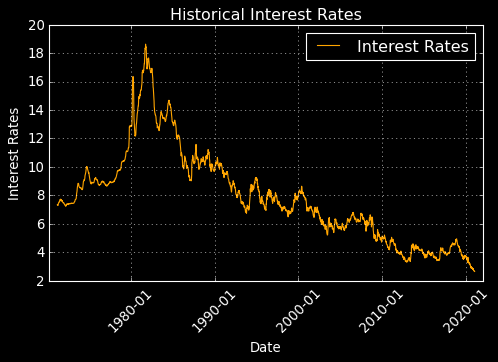

In [30]:
# plot just crude prices on one graph
fig, ax1=plt.subplots( figsize=(7,4))

ax1.set_xlabel('Date')
ax1.set_ylabel('Interest Rates')
ax1.plot(interest_rate_df['Date'],interest_rate_df['Interest Rate'], color='orange')
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
_=plt.xticks(rotation=45)
ax1.tick_params(axis='y')
ax1.set_title("Historical Interest Rates")
plt.margins(x=.02)

ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax1.grid()

# defining legend style and data
blue_line = mlines.Line2D([], [], color='orange', label='Interest Rates')
plt.legend(handles=[blue_line], loc='best')
plt.savefig("InterestRates.png", bbox_inches='tight')

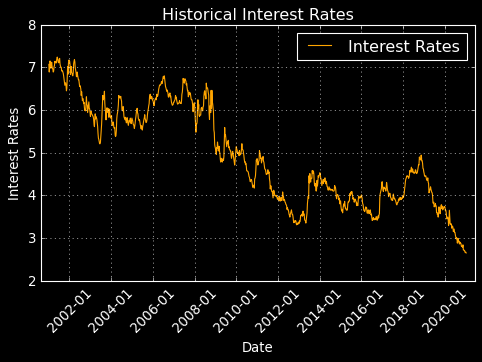

In [31]:
# Filter data by date to only include interest rates after 2000
interest_rate_df_two_thousand=interest_rate_df[interest_rate_df['Date'] >= '2000-12-31']
# plot just crude prices on one graph
fig, ax1=plt.subplots( figsize=(7,4))

ax1.set_xlabel('Date')
ax1.set_ylabel('Interest Rates')
ax1.plot(interest_rate_df_two_thousand['Date'],interest_rate_df_two_thousand['Interest Rate'], color='orange')
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
_=plt.xticks(rotation=45)
ax1.tick_params(axis='y') 
ax1.set_title("Historical Interest Rates")
plt.margins(x=.02)

ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax1.grid()

# defining legend style and data
blue_line = mlines.Line2D([], [], color='orange', label='Interest Rates')
plt.legend(handles=[blue_line], loc='best')
plt.savefig("InterestRates.png", bbox_inches='tight')

# California Census

In [33]:
CaliforniaCensusPopulation=pd.read_csv('../Data/PopulationCensus/CaliforniaCensusPopulation.csv')
CaliforniaCensusPopulation=CaliforniaCensusPopulation.drop(['SUMLEV', 'STATE', 'COUNTY', 'PLACE', 'COUSUB', 'CONCIT', 'PRIMGEO_FLAG', 'FUNCSTAT', 'STNAME', 'CENSUS2010POP', 'ESTIMATESBASE2010'], axis=1)
CaliforniaCensusPopulation.rename(columns={'POPESTIMATE2010':'2010', 'POPESTIMATE2011':'2011', "POPESTIMATE2012":'2012', 'POPESTIMATE2013':'2013', 'POPESTIMATE2014':"2014", 'POPESTIMATE2015':'2015', 'POPESTIMATE2016':'2016', 'POPESTIMATE2017':'2017', 'POPESTIMATE2018':'2018', 'POPESTIMATE2019':'2019'}, inplace=True)  
CaliforniaCensusPopulation=CaliforniaCensusPopulation[1:]
CaliforniaCensusPopulation['NAME']=CaliforniaCensusPopulation['NAME'].str.replace('city','')
CaliforniaCensusPopulation['NAME']=CaliforniaCensusPopulation['NAME'].str.replace('town','')
CaliforniaCensusPopulation

,NAME,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,Adelanto,31661,31864,31088,31206,32522,32961,33249,33952,34070,34049
2,Agoura Hills,20338,20475,20544,20591,20648,20740,20665,20572,20411,20222
3,Alameda,73946,74692,75637,76479,77509,78459,79091,79037,78344,77624
4,Albany,18539,18720,18957,19187,19434,19662,19713,20076,19885,19696
5,Alhambra,83160,83594,84120,84337,84786,84843,85221,84878,84373,83750
...,...,...,...,...,...,...,...,...,...,...,...
1072,Balance of Yolo County,24411,24573,26127,26494,25966,26848,28429,29197,29546,29705
1073,Yuba County,72348,72489,72774,73090,73533,74045,74952,76578,77557,78668
1074,Marysville,12094,12097,12113,12154,12165,12154,12193,12351,12452,12476
1075,Wheatland,3514,3518,3524,3508,3508,3728,3763,3819,3869,3873


In [34]:
# from geopy.geocoders import Nominatim
# geolocator = Nominatim(user_agent='jamals211')
# location = geolocator.geocode("Chicago Illinois")
# print(location.address)

In [35]:
# from geopy import geocoders  
# gn = geocoders.GeoNames(user_agent='jamals211')
# print gn.geocode("Cleveland Ohio")

In [36]:
# instantiate a new Nominatim client
app = Nominatim(user_agent="tutorial") 
# get location raw data
location = app.geocode("Wheatland, California").raw
print(location) 

{'place_id': 259058440, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'relation', 'osm_id': 6487021, 'boundingbox': ['38.99716', '39.021313', '-121.452411', '-121.407713'], 'lat': '39.0098947', 'lon': '-121.4230133', 'display_name': 'Wheatland, Yuba County, California, 95692, United States', 'class': 'boundary', 'type': 'administrative', 'importance': 0.6365891203021141, 'icon': 'https://nominatim.openstreetmap.org/ui/mapicons//poi_boundary_administrative.p.20.png'}


In [37]:
x=location
x['display_name'][0:10] 
# x['lon'] 

'Wheatland,'

In [ ]:
a=[]
c=[]
b=pd.DataFrame()
for i in CaliforniaCensusPopulation['NAME']:
    try:
        a=app.geocode(f"{i}, California").raw['lat']
        c.append(a)
    except:
        print('error')
    
    
#     a=app.geocode(f"{i}, California").raw['lat']
#     b['Lat']=a['lat']
#     b['Long']=a['lon']
print(a) 
    
    
    

In [ ]:
b=pd.DataFrame(c)
b

In [ ]:
print(CaliforniaCensusPopulation['NAME']) 